# Imports

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.get_data import *
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from src.preprocessing import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [36]:
bd_full = pd.read_csv('data/business.csv')
bd_full['attributes_AgesAllowed'].unique()

array([nan, '21plus', 'allages', '19plus', '18plus'], dtype=object)

In [37]:
b_data, u_data, reviews = get_training_data(verbose=True)
v_queries = get_validation_reviews()

X, y = construct_design_matrix(b_data, u_data, reviews, verbose=True)
X_valid, y_valid = construct_design_matrix(b_data, u_data, v_queries, verbose=True)

b_data.head()

========== Feature 'attributes_AgesAllowed' ==========
TYPE: string. Doing one-hot encoding.

========== Feature 'attributes_GoodForKids' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_OutdoorSeating' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsDelivery' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsGoodForGroups' ==========
TYPE: boolean. Changing False -> 0, True -> 1.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsPriceRange2' ==========
TYPE: numeric.
Detected NaN in column. Replacing with mean of non-NaN values.

========== Feature 'attributes_RestaurantsReservations' ==========
TYPE: 

,attributes_GoodForKids,attributes_OutdoorSeating,attributes_RestaurantsDelivery,attributes_RestaurantsGoodForGroups,attributes_RestaurantsPriceRange2,attributes_RestaurantsReservations,stars,attributes_AgesAllowedNAN,attributes_AgesAllowed21PLUS,attributes_AgesAllowedALLAGES,attributes_AgesAllowed19PLUS,attributes_AgesAllowed18PLUS,attributes_WiFiNO,attributes_WiFiFREE,attributes_WiFiNAN,attributes_WiFiPAID
business_id,,,,,,,,,,,,,,,,
KuxDPl6UYNLxFChPm0_MNw,0.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
6SAfQKe2oM5g_EtcYXyAMg,1.0,1.0,0.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
upB0RQl-l529IVwgOpwOQQ,0.0,1.0,0.0,1.0,1.0,0.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
TulmRC5V0--dnXYd_GOSvA,1.0,0.0,0.0,1.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
yqYtY3-Po4OVPafA9Z-Xyw,1.0,0.0,0.0,1.0,2.0,1.0,3.5,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


# Preprocessing / dimensionality reduction

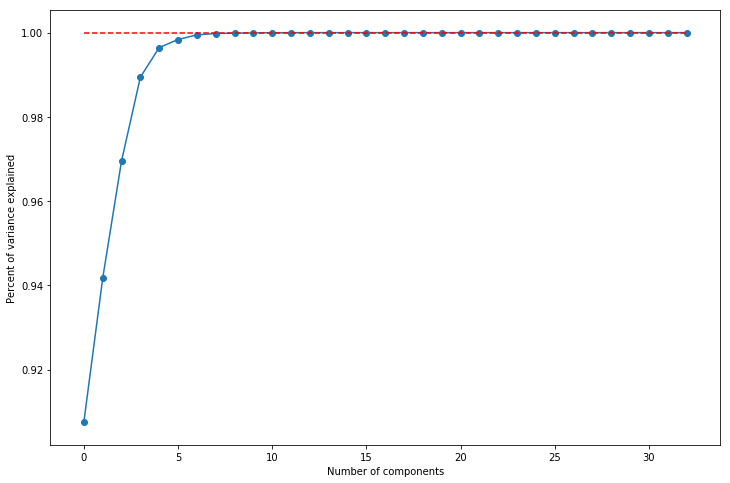

Using 10 components - 0.999978 of variance explained.


In [80]:
X_n = normalize_columns(X)
X_valid_n = normalize_columns(X_valid)

Z = get_PCA_matrix(X, n_components=10, plot_expl_variance=True, verbose=True)
X_pca = np.dot(X, Z.T)
X_valid_pca = np.dot(X_valid, Z.T)

# Regression

In [90]:
results = dict()

def rmse(y1, y2):
    return np.sqrt(np.mean((y1-y2)**2))

In [91]:
clf = Ridge(alpha=0.05)
clf.fit(X, y)

clf_n = Ridge(alpha=0.05)
clf_n.fit(X_n, y)

clf_pca = Ridge(alpha=0.05)
clf_pca.fit(X_pca, y)


# training error
y_pred_train = clf.predict(X)
mse_train = rmse(y, y_pred_train)
print('%f  <- Training RMSE' % mse_train)

# training error (normalized columns)
y_pred_train_norm = clf_n.predict(X_n)
mse_train_norm = rmse(y, y_pred_train_norm)
print('%f  <- Training RMSE (norm)' % mse_train_norm)

# training error (PCA)
y_pred_train_pca = clf_pca.predict(X_pca)
mse_train_pca = rmse(y, y_pred_train_pca)
print('%f  <- Training RMSE (PCA)' % mse_train_pca)

print('')

# validation error
y_pred_valid = clf.predict(X_valid)
mse_valid = rmse(y_valid, y_pred_valid)
print('%f  <- Validation RMSE' % mse_valid)

# validation error (normalized columns)
y_pred_valid_norm = clf_n.predict(X_valid_n)
mse_valid_norm = rmse(y_valid, y_pred_valid_norm)
print('%f  <- Validation RMSE (norm)' % mse_valid_norm)

# validation error (PCA)
y_pred_valid_pca = clf_pca.predict(X_valid_pca)
mse_valid_pca = rmse(y_valid, y_pred_valid_pca)
print('%f  <- Validation RMSE (PCA)' % mse_valid_pca)

1.005747  <- Training RMSE
1.005855  <- Training RMSE (norm)
1.149530  <- Training RMSE (PCA)

1.052268  <- Validation RMSE
1.087857  <- Validation RMSE (norm)
1.266225  <- Validation RMSE (PCA)


# Inspect weight vector

num weights ~= 0: 9


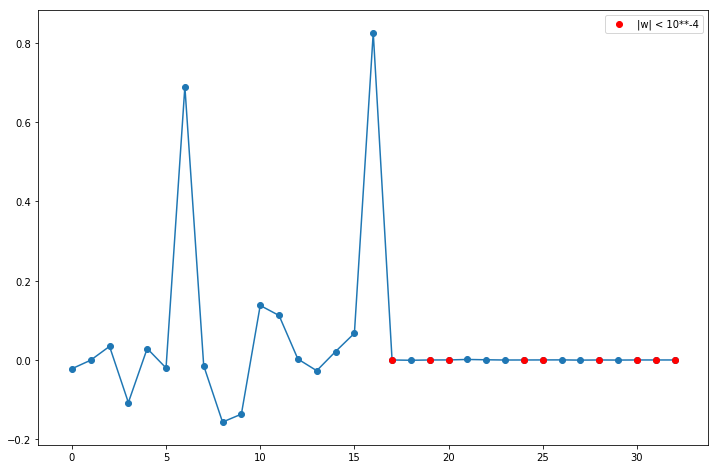

In [99]:
w = clf.coef_
xs = range(len(w))

tiny_weights = np.argwhere(abs(w) <= 10**-4)
print('num weights ~= 0: %d' % len(tiny_weights))


f, ax = plt.subplots(figsize=(12, 8))
ax.plot(xs, w)
ax.scatter(xs, w)
ax.scatter(tiny_weights, w[tiny_weights], color='red', zorder=5, label='|w| < 10**-4')
plt.legend()
plt.show()

In [102]:
all_columns = np.append(b_data.columns, u_data.columns)

for i, col in enumerate(all_columns):
    if w[i] < 0:
        print('%f  <- |w| for %s' % (w[i], col))
    else:
        print(' %f  <- |w| for %s' % (w[i], col))

-0.022158  <- |w| for attributes_GoodForKids
-0.000530  <- |w| for attributes_OutdoorSeating
 0.034338  <- |w| for attributes_RestaurantsDelivery
-0.107442  <- |w| for attributes_RestaurantsGoodForGroups
 0.028911  <- |w| for attributes_RestaurantsPriceRange2
-0.020178  <- |w| for attributes_RestaurantsReservations
 0.689842  <- |w| for stars
-0.014527  <- |w| for attributes_AgesAllowedNAN
-0.156745  <- |w| for attributes_AgesAllowed21PLUS
-0.136656  <- |w| for attributes_AgesAllowedALLAGES
 0.137557  <- |w| for attributes_AgesAllowed19PLUS
 0.112263  <- |w| for attributes_AgesAllowed18PLUS
 0.002355  <- |w| for attributes_WiFiNO
-0.027051  <- |w| for attributes_WiFiFREE
 0.021345  <- |w| for attributes_WiFiNAN
 0.067386  <- |w| for attributes_WiFiPAID
 0.826106  <- |w| for average_stars
-0.000019  <- |w| for compliment_cool
-0.000743  <- |w| for compliment_cute
-0.000019  <- |w| for compliment_funny
 0.000086  <- |w| for compliment_hot
 0.001274  <- |w| for compliment_list
 0.000479  